In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/revenue-forecast/items.csv
/kaggle/input/revenue-forecast/DATA MINING CUP 2017_features.pdf
/kaggle/input/revenue-forecast/class.csv
/kaggle/input/revenue-forecast/realclass.csv
/kaggle/input/revenue-forecast/train.csv
/kaggle/input/revenue-forecast/DATA MINING CUP 2017_task.pdf


In [3]:
#Seperating the data by | in columns
train = pd.read_csv("/kaggle/input/revenue-forecast/train.csv", sep="|")
Class = pd.read_csv("/kaggle/input/revenue-forecast/class.csv", sep = "|")
items = pd.read_csv("/kaggle/input/revenue-forecast/items.csv", sep = "|")
realclass = pd.read_csv("/kaggle/input/revenue-forecast/realclass.csv", sep = "|")

# ****Understanding the Data****

In [4]:
train.shape

(2756003, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756003 entries, 0 to 2756002
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   lineID           int64  
 1   day              int64  
 2   pid              int64  
 3   adFlag           int64  
 4   availability     int64  
 5   competitorPrice  float64
 6   click            int64  
 7   basket           int64  
 8   order            int64  
 9   price            float64
 10  revenue          float64
dtypes: float64(3), int64(8)
memory usage: 231.3 MB


In [6]:
train.dtypes

lineID               int64
day                  int64
pid                  int64
adFlag               int64
availability         int64
competitorPrice    float64
click                int64
basket               int64
order                int64
price              float64
revenue            float64
dtype: object

In [7]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lineID,2756003.0,1.378002e+06,795589.681306,1.00,689001.50,1378002.00,2067002.50,2756003.00
day,2756003.0,4.992118e+01,25.294512,1.00,31.00,50.00,71.00,92.00
pid,2756003.0,1.044790e+04,6456.012738,1.00,4313.00,10077.00,16144.00,22035.00
adFlag,2756003.0,3.177888e-01,0.465617,0.00,0.00,0.00,1.00,1.00
availability,2756003.0,1.111035e+00,0.392178,1.00,1.00,1.00,1.00,4.00
competitorPrice,2655316.0,1.277288e+01,12.752950,0.00,5.48,8.99,15.06,264.59
click,2756003.0,5.743198e-01,0.494446,0.00,0.00,1.00,1.00,1.00
basket,2756003.0,1.698423e-01,0.375494,0.00,0.00,0.00,0.00,1.00
order,2756003.0,2.558379e-01,0.436331,0.00,0.00,0.00,1.00,1.00
price,2756003.0,1.385008e+01,13.623073,0.02,6.00,9.85,16.45,378.84


In [8]:
print("Train data sample: \n\n",train.head(5),"\n")
print("Items data sample:\n\n",items.head(5),"\n")

Train data sample: 

    lineID  day    pid  adFlag  availability  competitorPrice  click  basket  \
0       1    1   6570       0             2            14.60      1       0   
1       2    1  14922       1             1             8.57      0       1   
2       3    1  16382       0             1            14.77      0       1   
3       4    1   1145       1             1             6.59      0       0   
4       5    1   3394       0             1             4.39      0       0   

   order  price  revenue  
0      0  16.89     0.00  
1      0   8.75     0.00  
2      0  16.06     0.00  
3      1   6.55     6.55  
4      1   4.14     4.14   

Items data sample:

    pid  manufacturer     group content unit pharmForm  genericProduct  \
0    1             1      2FOI      80   ST       TAB               0   
1    2             1      2FOI      80   ST       Tab               0   
2    3             1      2FOI      10    G       GLO               0   
3    4             1      

# **Data Preprocessing**

1. **Finding missing values**

In [9]:
items_missing_values = items.isnull().sum()
items_missing_values[items_missing_values > 0]

pharmForm         2327
category          4627
campaignIndex    20697
dtype: int64

In [10]:
class_missing_values = Class.isnull().sum()
class_missing_values[class_missing_values > 0]

competitorPrice    38005
dtype: int64

**Observation**

* pharmForm: 2327 missing values
* category: 4627 missing values
* campaignIndex: 20697 missing values

We can handle these missing values based on the importance of each feature and the nature of the data. Here are some common strategies:

**Fill with a Default Value:** For categorical features like pharmForm, campaignIndex and category, we might fill missing values with a special category like "Unknown."

Since the competitorPrice column represents the price of the same product at other stores, missing values might indicate that there was no available competitor price for those products.Fill missing values with a specific number, such as 0, indicating no competitor price.

**Remove Columns:** If a column has too many missing values and is not crucial for the analysis, it might be removed altogether.

2. **Filling missing data**

In [11]:
items["pharmForm"].fillna("Unknown", inplace = True)
items[items['pharmForm'] == 'Unknown']

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,rrp
30,31,14,22OIF,5X10,ML,Unknown,0,53,13.0,NaN,15.40
32,33,15,22OIG,1,ST,Unknown,0,53,15.0,NaN,15.95
39,40,15,22OIG,1,ST,Unknown,0,53,14.0,NaN,6.49
40,41,15,22OIG,1,ST,Unknown,0,53,14.0,NaN,6.49
44,45,21,20OH0,3,ST,Unknown,0,53,20.0,NaN,6.05
...,...,...,...,...,...,...,...,...,...,...,...
21999,22000,1067,22OIO,1,P,Unknown,0,53,NaN,NaN,6.37
22023,22024,387,22OI2,150,ML,Unknown,0,53,24.0,NaN,7.65
22026,22027,1018,21OKG,500,G,Unknown,0,53,323.0,NaN,9.79
22031,22032,387,22OI3,475,ML,Unknown,0,53,8.0,NaN,5.45


In [12]:
items["category"].fillna("Unknown", inplace = True)
items[items['category'] == 'Unknown']

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,rrp
0,1,1,2FOI,80,ST,TAB,0,40,Unknown,NaN,10.89
1,2,1,2FOI,80,ST,Tab,0,40,Unknown,NaN,10.89
2,3,1,2FOI,10,G,GLO,0,40,Unknown,NaN,16.45
3,4,1,2FOI,80,ST,TAB,0,40,Unknown,NaN,10.89
8,9,1,2FOI,10,G,GLO,0,40,Unknown,NaN,9.85
...,...,...,...,...,...,...,...,...,...,...,...
22028,22029,41,22OI2,400,ML,XDG,0,53,Unknown,NaN,16.39
22030,22031,844,21OIG,100,ST,Tab,0,53,Unknown,NaN,13.42
22032,22033,19,22OI3,100,G,SAL,0,53,Unknown,NaN,6.60
22033,22034,79,22OIO,1,ST,Unknown,0,53,Unknown,NaN,27.49


In [13]:
items["campaignIndex"].fillna("Unknown", inplace = True)
items[items['campaignIndex'] == 'Unknown']

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,rrp
0,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,10.89
1,2,1,2FOI,80,ST,Tab,0,40,Unknown,Unknown,10.89
2,3,1,2FOI,10,G,GLO,0,40,Unknown,Unknown,16.45
3,4,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,10.89
4,5,2,10OJ03JS,8,ST,PUL,0,40,1.0,Unknown,22.53
...,...,...,...,...,...,...,...,...,...,...,...
22030,22031,844,21OIG,100,ST,Tab,0,53,Unknown,Unknown,13.42
22031,22032,387,22OI3,475,ML,Unknown,0,53,8.0,Unknown,5.45
22032,22033,19,22OI3,100,G,SAL,0,53,Unknown,Unknown,6.60
22033,22034,79,22OIO,1,ST,Unknown,0,53,Unknown,Unknown,27.49


In [14]:
Class["competitorPrice"].fillna(0, inplace = True)
Class[Class['competitorPrice'] == 0]

,lineID,day,pid,adFlag,availability,competitorPrice,price
88,89,93,21653,0,1,0.0,26.07
97,98,93,18535,0,2,0.0,29.35
156,157,93,21868,0,2,0.0,21.79
175,176,93,12397,0,1,0.0,10.73
176,177,93,12415,0,1,0.0,10.19
...,...,...,...,...,...,...,...
1210597,1210598,123,21565,0,1,0.0,9.72
1210602,1210603,123,15694,0,1,0.0,6.55
1210648,1210649,123,8491,0,1,0.0,14.25
1210713,1210714,123,12413,0,1,0.0,34.43


3. **Merging items and class and items and train**

In [15]:
merged_train = items.merge(train, on = "pid", how = "inner")
merged_train["competitorPrice"].fillna(0, inplace = True)
merged_train

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,...,lineID,day,adFlag,availability,competitorPrice,click,basket,order,price,revenue
0,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,198133,10,0,3,8.22,1,0,0,10.08,0.00
1,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,430014,21,0,3,8.71,1,0,0,10.08,0.00
2,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,768721,33,0,3,8.22,0,1,0,7.28,0.00
3,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,769328,33,0,3,8.22,0,0,1,7.28,7.28
4,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,1011505,40,0,3,8.22,1,0,0,8.42,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755998,22035,256,21OKG,120,ST,Wka,0,53,Unknown,Unknown,...,1543020,55,0,2,0.00,1,0,0,43.16,0.00
2755999,22035,256,21OKG,120,ST,Wka,0,53,Unknown,Unknown,...,1737317,61,0,2,0.00,0,1,0,44.36,0.00
2756000,22035,256,21OKG,120,ST,Wka,0,53,Unknown,Unknown,...,1738305,61,0,2,0.00,0,0,1,44.36,44.36
2756001,22035,256,21OKG,120,ST,Wka,0,53,Unknown,Unknown,...,1834119,64,0,2,0.00,0,0,1,44.36,44.36


4. **Creating new features or variables**

>1. **Price Difference:** The difference between the store's price and the competitor's price.
>2. **Discount from RRP:** The difference between the recommended retail price (RRP) and the store's price.
>3. **Price Ratio:** The ratio between the store's price and the competitor's price.
>4. **Weekly Cycle:** A weekly pattern extracted from the 'day' column.
>5. **Interactions** between adFlag and other columns like click, basket, order.
>6. **Product Popularity:*** A product's popularity (e.g., total clicks or orders) over the training period might affect future revenue.
>7. **Availability Impact:** Interaction between availability and other columns like click, basket, order.
>8. **Finding average price by product**


1. ***We can create a new feature called price_difference, which represents the difference between the store's price and the competitor's price. This might be an important factor in predicting revenue.**

In [16]:
merged_train['price_difference'] = abs(merged_train["price"] - merged_train["competitorPrice"])
merged_train['price_difference']

0           1.86
1           1.37
2           0.94
3           0.94
4           0.20
           ...  
2755998    43.16
2755999    44.36
2756000    44.36
2756001    44.36
2756002    45.56
Name: price_difference, Length: 2756003, dtype: float64

2. * **The difference between the recommended retail price (RRP) and the store's price might influence purchasing behavior.**

In [17]:
merged_train['discount_from_rrp'] = abs(merged_train['price']- merged_train['rrp'])
merged_train['discount_from_rrp']

0          0.81
1          0.81
2          3.61
3          3.61
4          2.47
           ... 
2755998    4.80
2755999    3.60
2756000    3.60
2756001    3.60
2756002    2.40
Name: discount_from_rrp, Length: 2756003, dtype: float64

3. *** The ratio between the store's price and the competitor's price might indicate how competitive the pricing is.**

In [18]:
epsilon = 1e-6
merged_train['price_ratio'] = merged_train["price"] / (merged_train["competitorPrice"] + epsilon)
merged_train['price_ratio']

0          1.226277e+00
1          1.157290e+00
2          8.856447e-01
3          8.856447e-01
4          1.024331e+00
               ...     
2755998    4.316000e+07
2755999    4.436000e+07
2756000    4.436000e+07
2756001    4.436000e+07
2756002    4.556000e+07
Name: price_ratio, Length: 2756003, dtype: float64

4. ***Since the day column represents the nth day out of the 3 months, we can still extract meaningful patterns by looking at cyclical patterns.**

In [19]:
merged_train['weekly_cycle'] = merged_train['day'] % 7
merged_train['weekly_cycle']

0          3
1          0
2          5
3          5
4          5
          ..
2755998    6
2755999    5
2756000    5
2756001    1
2756002    4
Name: weekly_cycle, Length: 2756003, dtype: int64

5. ***Interaction between adFlag and other columns like click, basket, order.**

In [20]:
merged_train['adFlag_click_interaction'] = merged_train['adFlag'] * merged_train['click']
merged_train['adFlag_basket_interaction'] = merged_train['adFlag'] * merged_train['basket']
merged_train['adFlag_order_interaction'] = merged_train['adFlag'] * merged_train['order']

6. ***Product Popularity:*** A product's popularity (e.g., total clicks or orders) over the training period might affect future revenue.

In [21]:
popularity_df = merged_train.groupby('pid')[['click', 'basket', 'order']].sum().reset_index()
popularity_df["popularity_score"] = popularity_df["click"] + popularity_df["basket"] + popularity_df["order"]

merged_train = merged_train.merge(popularity_df[['pid', 'popularity_score']], on='pid', how='left')
merged_train.head()

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,...,price,revenue,price_difference,discount_from_rrp,price_ratio,weekly_cycle,adFlag_click_interaction,adFlag_basket_interaction,adFlag_order_interaction,popularity_score
0,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,10.08,0.00,1.86,0.81,1.226277,3,0,0,0,8
1,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,10.08,0.00,1.37,0.81,1.157290,0,0,0,0,8
2,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,7.28,0.00,0.94,3.61,0.885645,5,0,0,0,8
3,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,7.28,7.28,0.94,3.61,0.885645,5,0,0,0,8
4,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,8.42,0.00,0.20,2.47,1.024331,5,0,0,0,8


7. **Availability Impact:** Interaction between availability and other columns like click, basket, order.

In [22]:
merged_train['availability_click_impact'] = merged_train['availability'] * merged_train['click']
merged_train['availability_basket_impact'] = merged_train['availability'] * merged_train['basket']
merged_train['availability_order_impact'] = merged_train['availability'] * merged_train['order']

# impact_df = merged_train.groupby('pid')[['click', 'basket', 'order']].sum().reset_index()
# impact_df["impact_score"] = popularity_df["click"] + popularity_df["basket"] + popularity_df["order"]

# merged_train = merged_train.merge(popularity_df[['pid', 'popularity_score']], on='pid', how='left')
merged_train.head()

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,...,discount_from_rrp,price_ratio,weekly_cycle,adFlag_click_interaction,adFlag_basket_interaction,adFlag_order_interaction,popularity_score,availability_click_impact,availability_basket_impact,availability_order_impact
0,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,0.81,1.226277,3,0,0,0,8,3,0,0
1,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,0.81,1.157290,0,0,0,0,8,3,0,0
2,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,3.61,0.885645,5,0,0,0,8,0,3,0
3,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,3.61,0.885645,5,0,0,0,8,0,0,3
4,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,2.47,1.024331,5,0,0,0,8,3,0,0


8. **Finding average price by product**

In [23]:
avgprice_df = merged_train.groupby('pid')[['price']].mean().reset_index()
avgprice_df.rename(columns={'price': 'average_price'}, inplace=True)
merged_train = merged_train.merge(avgprice_df[['pid', 'average_price']], on='pid', how='left')
merged_train.head()

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,...,price_ratio,weekly_cycle,adFlag_click_interaction,adFlag_basket_interaction,adFlag_order_interaction,popularity_score,availability_click_impact,availability_basket_impact,availability_order_impact,average_price
0,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,1.226277,3,0,0,0,8,3,0,0,9.1025
1,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,1.157290,0,0,0,0,8,3,0,0,9.1025
2,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,0.885645,5,0,0,0,8,0,3,0,9.1025
3,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,0.885645,5,0,0,0,8,0,0,3,9.1025
4,1,1,2FOI,80,ST,TAB,0,40,Unknown,Unknown,...,1.024331,5,0,0,0,8,3,0,0,9.1025


9. **Category-Based Features**

In [34]:
category_features = merged_train.groupby('category').agg(
    mean_price=pd.NamedAgg(column='price', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum'),
    mean_competitor_price=pd.NamedAgg(column='competitorPrice', aggfunc='mean'),
    total_orders=pd.NamedAgg(column='order', aggfunc='sum')
).reset_index()
merged_train = merged_train.merge(category_features[['category', 'mean_price','total_revenue','mean_competitor_price', 'total_orders']], on='category', how='left',suffixes=('', '_by_category'))
merged_train['category'].replace('Unknown', -1, inplace=True)
merged_train['category'] = merged_train['category'].astype(float)
merged_train.head()

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,...,availability_order_impact,average_price,mean_price,total_revenue,mean_competitor_price,total_orders,mean_price_by_category,total_revenue_by_category,mean_competitor_price_by_category,total_orders_by_category
0,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,9.1025,15.516662,240949.63,11.539796,15782,15.516662,240949.63,11.539796,15782
1,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,9.1025,15.516662,240949.63,11.539796,15782,15.516662,240949.63,11.539796,15782
2,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,9.1025,15.516662,240949.63,11.539796,15782,15.516662,240949.63,11.539796,15782
3,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,3,9.1025,15.516662,240949.63,11.539796,15782,15.516662,240949.63,11.539796,15782
4,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,9.1025,15.516662,240949.63,11.539796,15782,15.516662,240949.63,11.539796,15782


# Exploratory Data Analysis (EDA)

**Distribution of Prices and Revenue plot**

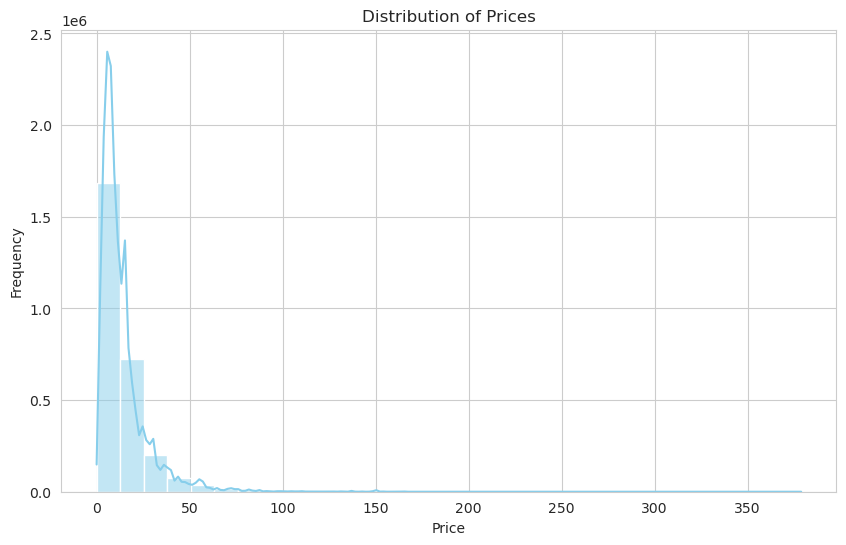

In [25]:
# Setting the style for the plots
sns.set_style("whitegrid")

# Plotting the distribution of the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(merged_train['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

***Observations and Insights:***

> **Right-Skewed Distribution:** The plot shows that the distribution of prices is right-skewed, meaning that most of the products have lower prices, and there are fewer products with higher prices.

> **Peak Around Lower Prices:** There is a significant peak around the lower price range, indicating that a substantial portion of the products falls within this price category.

> **Long Tail:** The long tail on the right side shows that there are some products with much higher prices, but they are relatively rare compared to the products in the lower price range.

> **Potential Outliers:** The long tail may also suggest the presence of potential outliers or unusually high-priced items that could be further investigated.

**Time series plot of daily revenue**

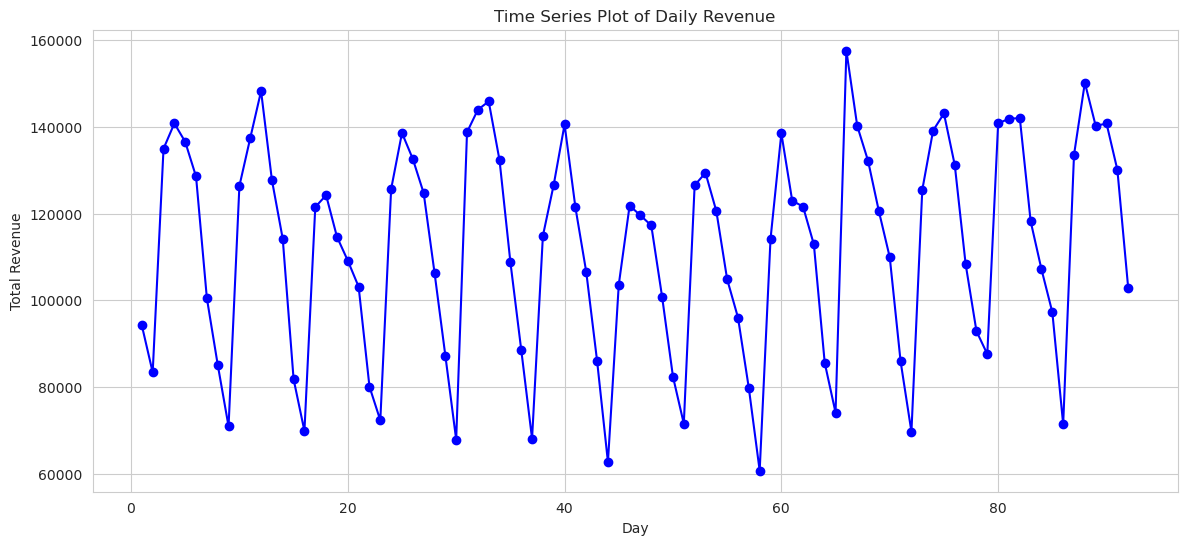

In [26]:
# Grouping the data by 'day' and summing the 'revenue' for each day
daily_revenue = merged_train.groupby('day')['revenue'].sum().reset_index()

# Plotting the time series of daily revenue
plt.figure(figsize=(14, 6))
plt.plot(daily_revenue['day'], daily_revenue['revenue'], marker='o', linestyle='-', color='blue')
plt.title('Time Series Plot of Daily Revenue')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

***Obeservation***

Further analysis to be done:-

> **Seasonal Decomposition:** Break down the time series into trend, seasonal.

> **Analyze Weekly Patterns:** Aggregate the data by weeks to see if there are specific weekly trends.

**Correlation matrix**
* A correlation of 1 indicates a perfect positive correlation.
* A correlation of -1 indicates a perfect negative correlation.
* A correlation close to 0 indicates no linear relationship.

/tmp/ipykernel_28/756870105.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


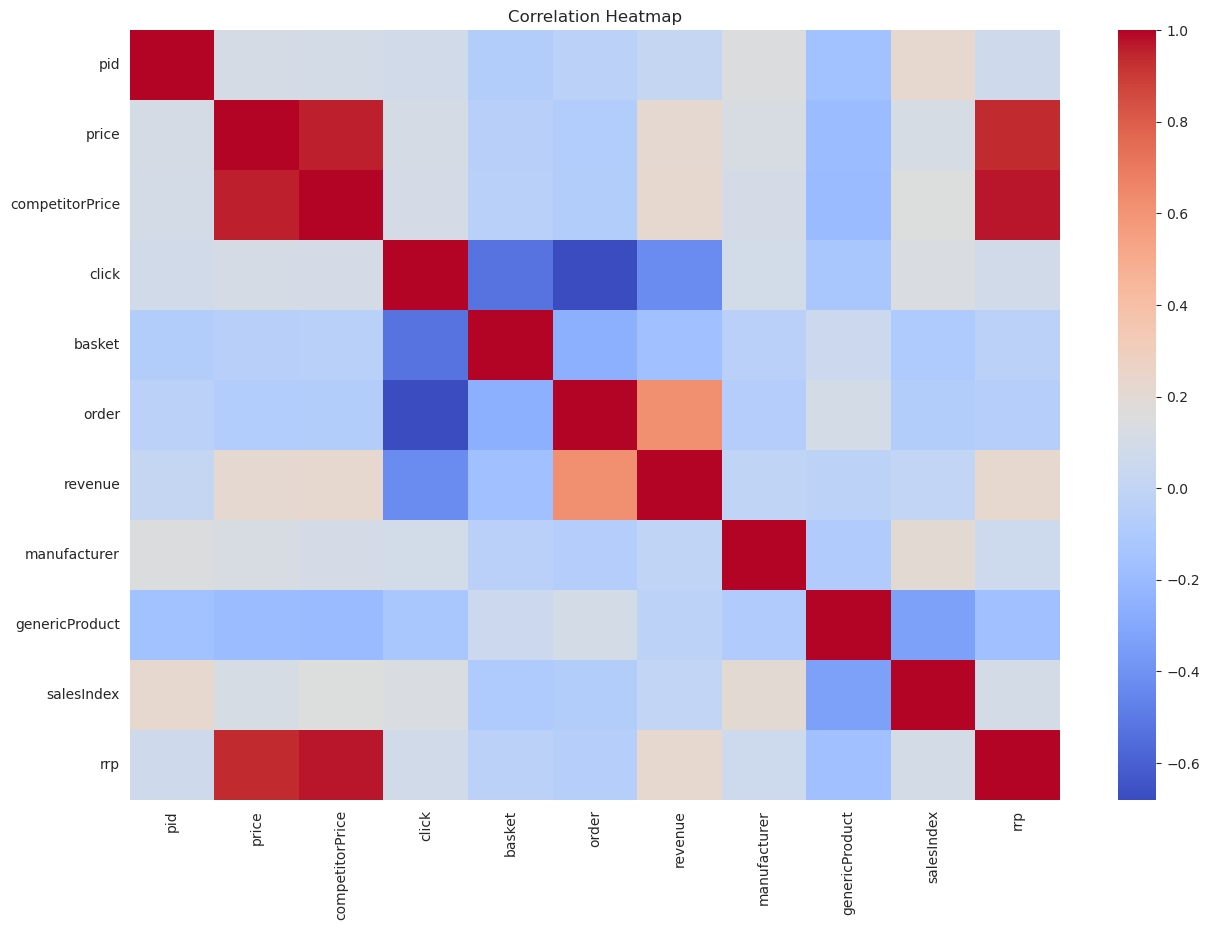

In [27]:
train_columns = ['pid', 'price', 'competitorPrice', 'click', 'basket', 'order', 'revenue']
train_data = train[train_columns]

# Selecting columns of interest from the items data
items_columns = ['pid', 'manufacturer', 'group', 'content', 'unit', 'pharmForm', 'genericProduct', 'salesIndex', 'category', 'rrp']
items_data = items[items_columns]

train_data = train_data.merge(items_data, on='pid', how='inner')

# Calculating the correlation matrix
correlation_matrix = train_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# Calculating the pairwise correlations for the 'train.csv' data
correlations = train_data.corr()

# Focusing on the correlation with the 'revenue' column
revenue_correlations = correlations['revenue'].sort_values(ascending=False)

# Displaying the correlations with 'revenue'
revenue_correlations

/tmp/ipykernel_28/1476159508.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_data.corr()


revenue            1.000000
order              0.624785
rrp                0.224601
competitorPrice    0.220593
price              0.216488
pid                0.019133
salesIndex         0.006919
manufacturer      -0.009186
genericProduct    -0.029488
basket            -0.165700
click             -0.425515
Name: revenue, dtype: float64

**Summary and Insights**
>**order (0.624785):** 
>* Summary: A strong positive correlation with revenue.  
>* Insight: As the number of orders increases, the revenue tends to increase as well. This makes intuitive sense, as more orders would generally lead to higher revenue.

>**rrp, competitorPrice, price (0.224601, 0.220593, 0.216488):**
>* Summary: Positive correlations with revenue, though not as strong as the order correlation.
>* Insight: Higher prices are associated with higher revenue. This could indicate that more expensive products contribute significantly to revenue or that pricing strategy affects revenue.

>**pid (0.019133), salesIndex (0.006919), manufacturer (-0.009186):**
>* Summary: Weak correlations with revenue (close to 0).
>* Insight: These variables (product ID, sales index, and manufacturer) do not seem to have a strong relationship with revenue. They may not be significant predictors for revenue modeling.

>**genericProduct (-0.029488):**
>* Summary: A weak negative correlation with revenue.
>* Insight: Generic products might slightly negatively impact revenue. This could reflect customer preference for branded products.

>**basket (-0.165700):**
>* Summary: A moderate negative correlation with revenue.
>* Insight: An increase in items added to the shopping basket but not purchased may be associated with lower revenue. This could indicate a need to improve the conversion rate from basket to purchase.

>**click (-0.425515):**
>* Summary: A stronger negative correlation with revenue.
>* Insight: A higher number of clicks without corresponding purchases could be negatively impacting revenue. This might point to issues in user experience or product attractiveness that prevent users from completing a purchase after clicking.

**Summary Statistics**

In [29]:
# Calculating summary statistics for key variables
summary_statistics = merged_train[['price', 'competitorPrice', 'revenue']].describe()

# Including the median in the summary statistics
summary_statistics.loc['median'] = train_data[['price', 'competitorPrice', 'revenue']].median()

# Displaying the summary statistics
summary_statistics

,price,competitorPrice,revenue
count,2.756003e+06,2.756003e+06,2.756003e+06
mean,1.385008e+01,1.230624e+01,3.750979e+00
std,1.362307e+01,1.274514e+01,1.023919e+01
min,2.000000e-02,0.000000e+00,0.000000e+00
25%,6.000000e+00,5.130000e+00,0.000000e+00
50%,9.850000e+00,8.750000e+00,0.000000e+00
75%,1.645000e+01,1.484000e+01,1.930000e+00
max,3.788400e+02,2.645900e+02,8.877000e+02
median,9.850000e+00,8.990000e+00,0.000000e+00


In [30]:
# Calculating summary statistics for the 'price' variable
price_summary = merged_train['price'].describe()
price_summary['median'] = merged_train['price'].median() # Adding the median to the summary statistics

# Displaying the summary statistics for the 'price' variable
price_summary

count     2.756003e+06
mean      1.385008e+01
std       1.362307e+01
min       2.000000e-02
25%       6.000000e+00
50%       9.850000e+00
75%       1.645000e+01
max       3.788400e+02
median    9.850000e+00
Name: price, dtype: float64

**The summary statistics for the price variable provide the following insights:**

> **Count:** There are approximately 2.76 million price records.

>**Mean:** The average price of the products is around 13.85/unit (likely currency).

>**Standard Deviation:** The standard deviation of 13.62 indicates the spread of prices around the mean.

>**Minimum:** The minimum price is 0.02/unit.

>**25th Percentile (Q1):** 25% of the products are priced at 6.00/unit or lower.

>**Median:** The median price is 9.85/unit, which is the middle value in the dataset.

>**75th Percentile (Q3):** 75% of the products are priced at 16.45/unit or lower.

>**Maximum:** The maximum price is 378.84/unit.

**Scatter plots: Scatter plots are a great way to visualize the relationship between two variables.**

> **Price vs Revenue:** To see how the price of a product relates to the revenue generated.
> **Competitor Price vs Price:** To understand how the store's pricing relates to competitor pricing.
> **Clicks, Baskets, and Orders vs Revenue:** To visualize the relationship between user actions and revenue.


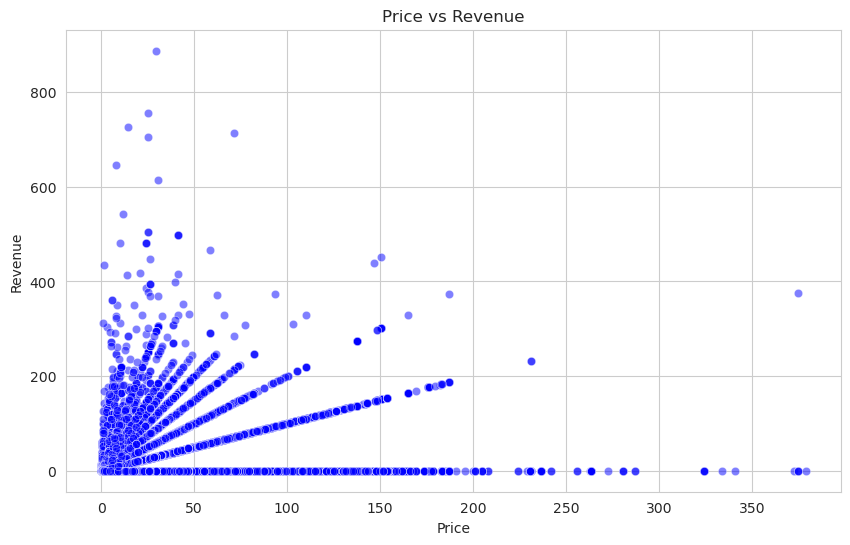

In [31]:
# Scatter plot for Price vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='revenue', data=train_data, alpha=0.5, color='blue')
plt.title('Price vs Revenue')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.show()


**Insights**
> **Customer Behavior:** Customers may be more inclined to purchase lower-priced items, leading to more transactions and revenue generation in that price range.

# Building a model

1. **Using linear regression model**

In [32]:
merged_train.head()

,pid,manufacturer,group,content,unit,pharmForm,genericProduct,salesIndex,category,campaignIndex,...,adFlag_order_interaction,popularity_score,availability_click_impact,availability_basket_impact,availability_order_impact,average_price,mean_price,total_revenue,mean_competitor_price,total_orders
0,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,8,3,0,0,9.1025,15.516662,240949.63,11.539796,15782
1,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,8,3,0,0,9.1025,15.516662,240949.63,11.539796,15782
2,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,8,0,3,0,9.1025,15.516662,240949.63,11.539796,15782
3,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,8,0,0,3,9.1025,15.516662,240949.63,11.539796,15782
4,1,1,2FOI,80,ST,TAB,0,40,-1.0,Unknown,...,0,8,3,0,0,9.1025,15.516662,240949.63,11.539796,15782


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = merged_train[['availability_basket_impact','availability_order_impact','availability_click_impact','adFlag_click_interaction','adFlag_basket_interaction','adFlag_order_interaction','price','rrp', 'pid', 'adFlag','price_difference','discount_from_rrp','price_ratio','weekly_cycle','popularity_score','competitorPrice','category','availability_order_impact', 'average_price','mean_price','mean_competitor_price','total_orders', 'mean_price_by_category','total_revenue_by_category','mean_competitor_price_by_category','total_orders_by_category']] 
y = merged_train['revenue']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Evaluate the model
predictions = model_lr.predict(X_val)
mse = mean_squared_error(y_val, predictions)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 56.7908943360705


> Checking if the model is performing well using baseline_msv

In [36]:
# Step 1: Calculate the mean revenue
mean_revenue = y_train.mean()

# Step 2: Create baseline predictions
baseline_predictions = [mean_revenue] * len(y_val)

# Step 3: Calculate the baseline MSE
baseline_mse = mean_squared_error(y_val, baseline_predictions)

# Step 4: Compare with model's MSE
print("Baseline MSE:", baseline_mse)
print("Linear Regression MSE:", mse)


Baseline MSE: 104.51075936312311
Linear Regression MSE: 56.7908943360705


2. **Using Random forest**

In [37]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model_rf.fit(X_train, y_train)

# Make predictions on the validation set
predictions_rf = model_rf.predict(X_val)

# Calculate the Mean Squared Error for the Random Forest model
mse_rf = mean_squared_error(y_val, predictions_rf)

# Print the result
print("Random Forest MSE:", mse_rf)

Random Forest MSE: 25.583910946844387


3. **Gradient boosting**

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model_gb.fit(X_train, y_train)

# Make predictions on the validation set
predictions_gb = model_gb.predict(X_val)

# Calculate the Mean Squared Error for the Gradient Boosting model
mse_gb = mean_squared_error(y_val, predictions_gb)

# Print the result
print("Gradient Boosting MSE:", mse_gb)

Gradient Boosting MSE: 23.236535915235677
